In [37]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Save file path to variable
sales_csv = Path("../data_frames/average_median_sale_price_by_quarter.csv")

# Read with Pandas
sales_df = pd.read_csv(sales_csv)
sales_df.head()

,Unnamed: 0,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,...,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1
0,Zip Code: 98101,632000,480167,503150,499833,578000,531667,421683,473167,697667,...,863425,942889,745000,631167,646454,538833,658333,652128,600278,850000
1,Zip Code: 98102,478400,469706,472678,510033,481990,563115,574748,713090,588084,...,1033128,1118357,1077755,1052790,991762,971769,1000496,1043535,1071667,829414
2,Zip Code: 98103,396300,440550,407155,394756,408807,449780,443280,459820,472632,...,788623,847252,875080,868017,905467,851765,938605,942392,912098,880175
3,Zip Code: 98104,324833,302212,206200,246000,301667,354000,311833,491003,770344,...,562483,393975,420808,419158,376642,415892,413967,408892,381217,453400
4,Zip Code: 98105,458600,508259,500059,483693,441060,504517,541387,491943,533933,...,899382,1026050,1227836,1190863,1051495,975626,1057597,985137,931402,1015833


In [41]:
sales_df.columns

Index(['Unnamed: 0', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
       '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
       '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2',
       '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1',
       '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4',
       '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3',
       '2023Q4', '2024Q1'],
      dtype='object')

In [43]:
sales_df = sales_df[['Unnamed: 0','2018Q1', '2018Q2',
       '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1',
       '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4',
       '2022Q1', '2022Q2', '2022Q3', '2022Q4',]]
sales_df.head()

,Unnamed: 0,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,...,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4
0,Zip Code: 98101,798633,784300,753333,778850,712483,639000,705417,656067,587417,...,812367,682636,675500,633417,665332,863425,942889,745000,631167,646454
1,Zip Code: 98102,1061160,1123953,1099862,1154782,994948,904183,912748,987686,976643,...,1050193,1035250,931803,991560,1445086,1033128,1118357,1077755,1052790,991762
2,Zip Code: 98103,784596,832872,826282,758228,757417,768683,764391,730155,756017,...,779648,739083,763935,835932,840817,788623,847252,875080,868017,905467
3,Zip Code: 98104,556133,664800,701333,404000,579833,663975,599667,529000,578333,...,625000,518750,562333,620617,582379,562483,393975,420808,419158,376642
4,Zip Code: 98105,830869,928014,910872,889047,833879,818875,945965,833618,795855,...,934495,903188,882166,912276,930376,899382,1026050,1227836,1190863,1051495


In [45]:
sales_df['Unnamed: 0'] = sales_df['Unnamed: 0'].str.replace(r'[^0-9]', '', regex=True)

In [47]:
sales_df.head()

,Unnamed: 0,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,...,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4
0,98101,798633,784300,753333,778850,712483,639000,705417,656067,587417,...,812367,682636,675500,633417,665332,863425,942889,745000,631167,646454
1,98102,1061160,1123953,1099862,1154782,994948,904183,912748,987686,976643,...,1050193,1035250,931803,991560,1445086,1033128,1118357,1077755,1052790,991762
2,98103,784596,832872,826282,758228,757417,768683,764391,730155,756017,...,779648,739083,763935,835932,840817,788623,847252,875080,868017,905467
3,98104,556133,664800,701333,404000,579833,663975,599667,529000,578333,...,625000,518750,562333,620617,582379,562483,393975,420808,419158,376642
4,98105,830869,928014,910872,889047,833879,818875,945965,833618,795855,...,934495,903188,882166,912276,930376,899382,1026050,1227836,1190863,1051495


In [72]:
sales_df2 = sales_df.set_index('Unnamed: 0' , inplace=False)
sales_df2 = sales_df2.rename_axis('zip_code')


In [74]:
sales_df2.head()


,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4
zip_code,,,,,,,,,,,,,,,,,,,,
98101,798633,784300,753333,778850,712483,639000,705417,656067,587417,641642,812367,682636,675500,633417,665332,863425,942889,745000,631167,646454
98102,1061160,1123953,1099862,1154782,994948,904183,912748,987686,976643,1033230,1050193,1035250,931803,991560,1445086,1033128,1118357,1077755,1052790,991762
98103,784596,832872,826282,758228,757417,768683,764391,730155,756017,748912,779648,739083,763935,835932,840817,788623,847252,875080,868017,905467
98104,556133,664800,701333,404000,579833,663975,599667,529000,578333,620650,625000,518750,562333,620617,582379,562483,393975,420808,419158,376642
98105,830869,928014,910872,889047,833879,818875,945965,833618,795855,881382,934495,903188,882166,912276,930376,899382,1026050,1227836,1190863,1051495


In [92]:
# Create the X and Y axis lists

x_axis_data = sales_df2.columns

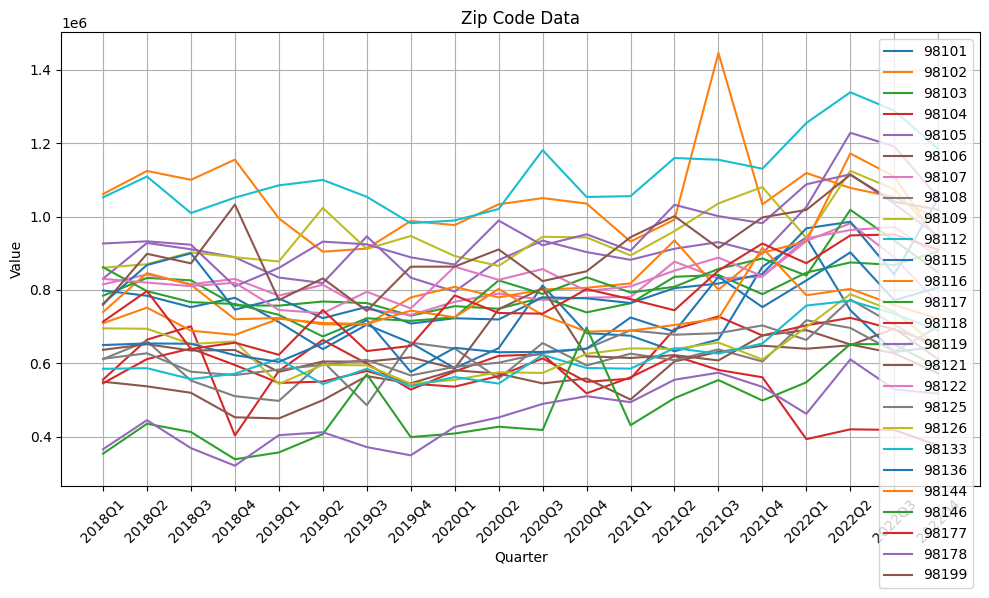

In [100]:
#Ken Lo
# Plotting
plt.figure(figsize=(10, 6))
#row = 1
for row in sales_df2.index:
    y_axis_data = sales_df2.loc[row,:]
    plt.plot(x_axis_data, y_axis_data, label=row)
# Add labels and legend
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Zip Code Data')
plt.legend()
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Plot the charts and apply some styling
sales_df, = plt.plot(x_axis_data, y_axis_data, color="red", label="Danger Drop")
railgun, = plt.plot(time, railgun_speeds, color="blue", label="RailGun")

In [ ]:
# Add labels to X and Y axes :: Add title
plt.title("Price of house by year & zip code ")
plt.xlabel("Year [2018-2022]")
plt.ylabel("Price of houses")
plt.show()

In [ ]:
# Set the limits for the X and Y axes
plt.xlim(0,120)
plt.ylim(5,95)
plt.show()

In [ ]:
# Create a legend for the chart
plt.legend(handles=[zip_code1, zip_code2], loc="best")
plt.show()

In [ ]:
# Add in a grid for the chart
plt.grid()
plt.show()